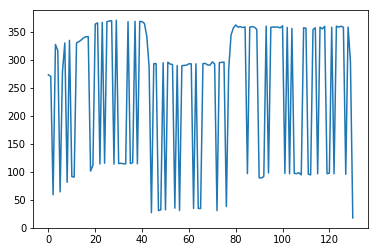

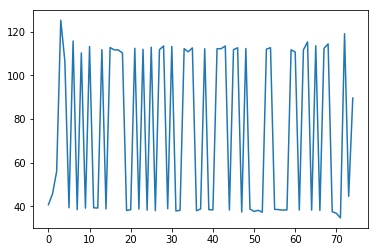

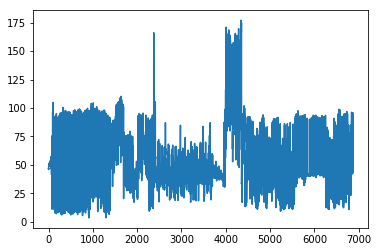

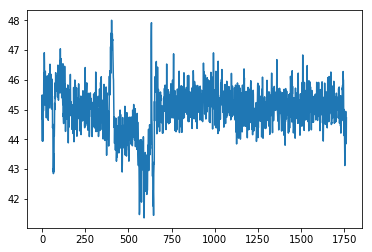

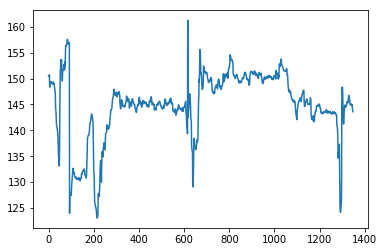

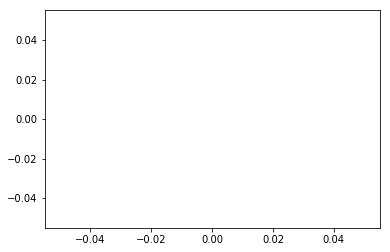

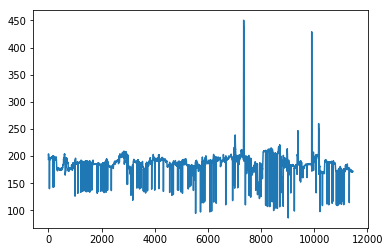

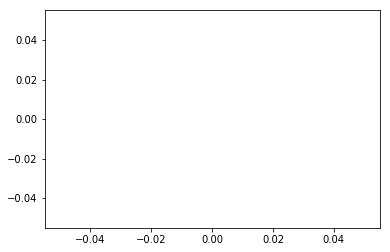

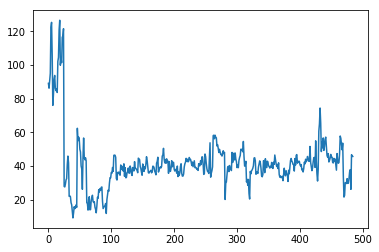

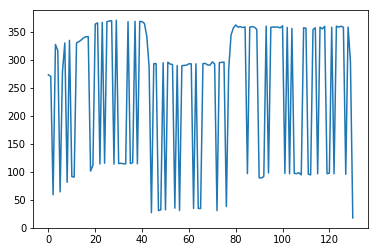

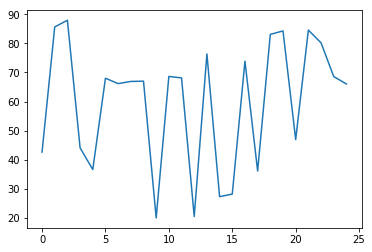

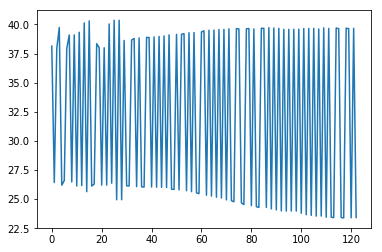

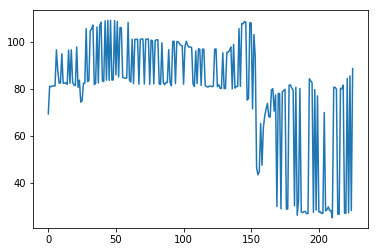

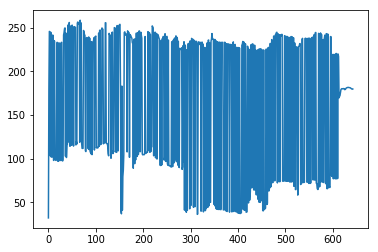

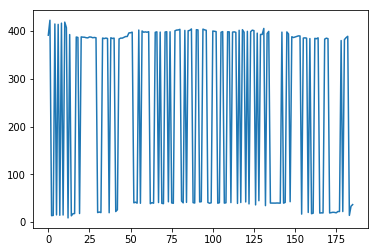

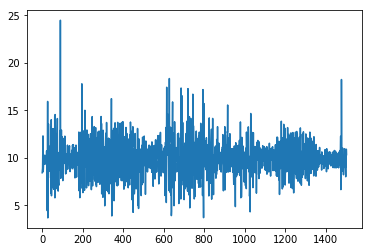

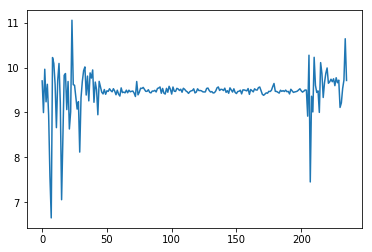

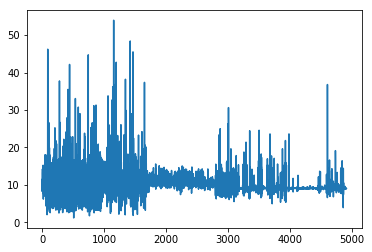

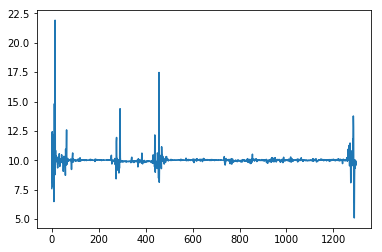

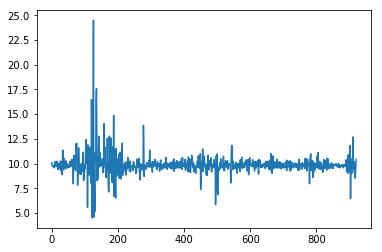

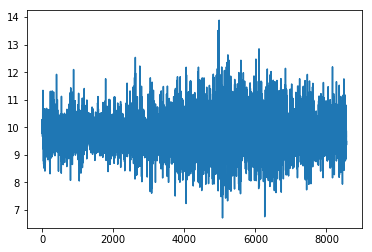

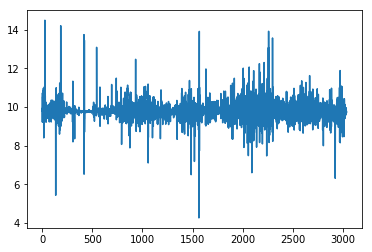

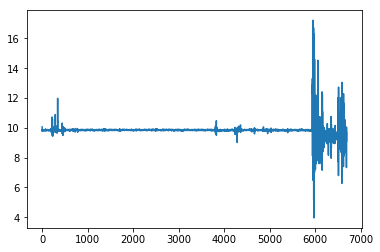

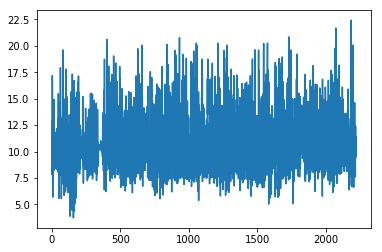

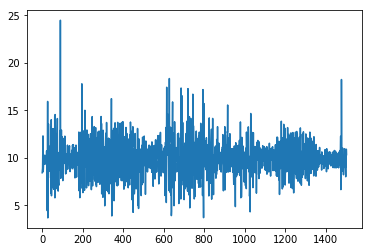

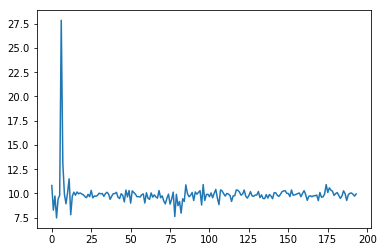

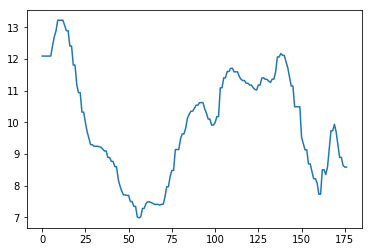

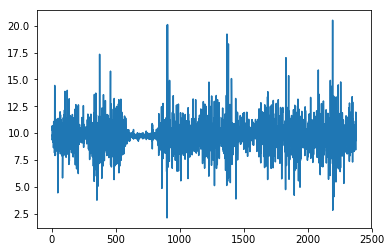

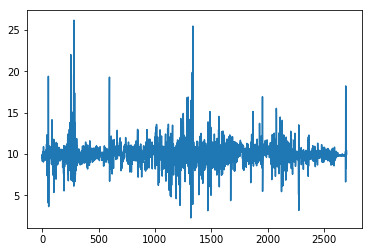

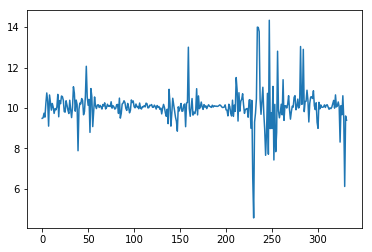

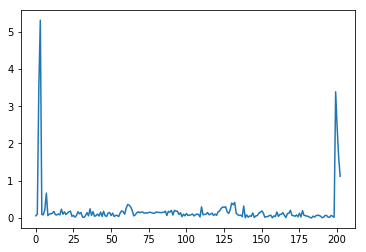

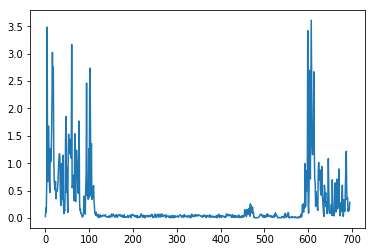

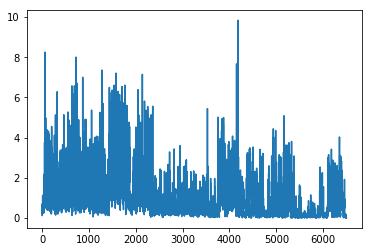

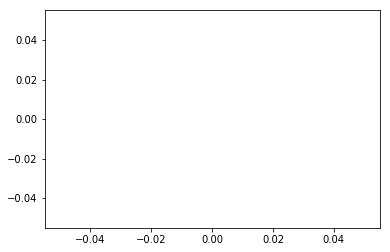

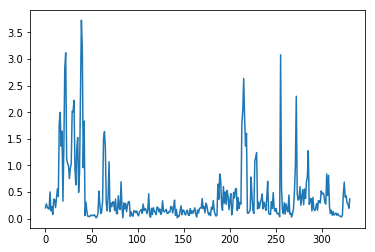

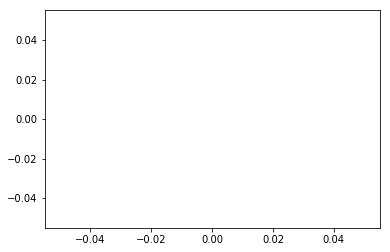

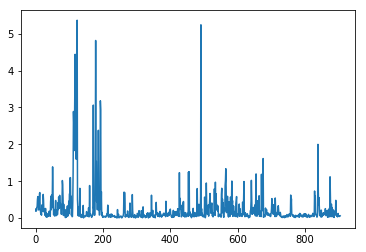

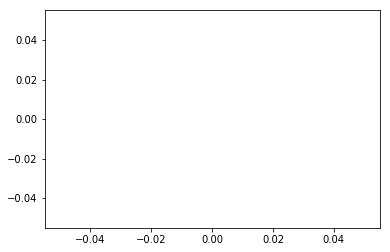

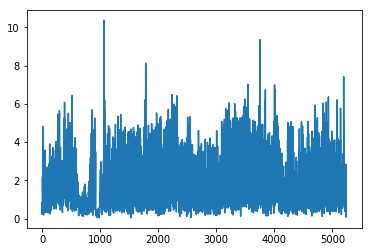

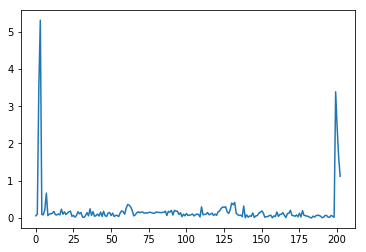

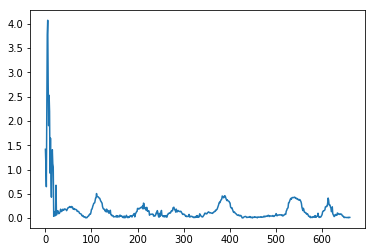

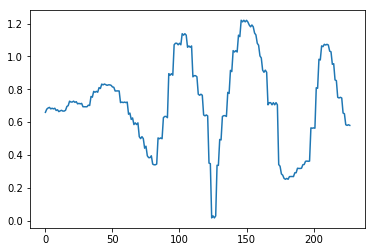

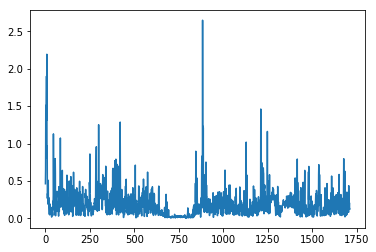

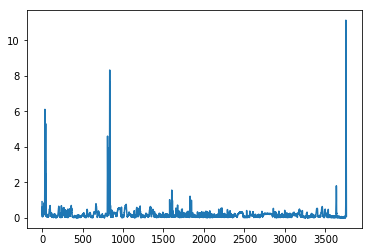

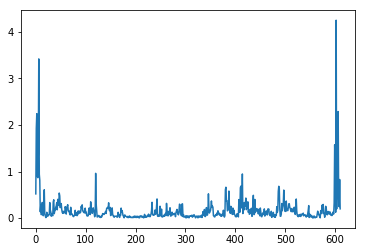

In [5]:
# plots of three axis sensors by user
import pandas as pd
import math
from matplotlib import pyplot
from matplotlib.pyplot import figure, draw
import os
from os import listdir

number_of_users = 16

dir_src = 'TransportationData/_RawDataCorrect/'
dir_out = 'DataVisualization'

list_of_three_axis_sensors = [
    'android.sensor.magnetic_field', 
    'android.sensor.accelerometer',
    'android.sensor.gyroscope'
]

if not os.path.exists(dir_out):
    os.mkdir(dir_out)

for sensor in list_of_three_axis_sensors:
    
    # create folder
    dir_out_sensor = dir_out + "/" + sensor
    if not os.path.exists(dir_out_sensor):
        os.mkdir(dir_out_sensor)
    
    # generate plots for each user
    filenames = listdir(dir_src)
    for i in range(0, number_of_users):
        list_of_magnitude = list()
        for filename in filenames:
            username = 'U{}'.format(i)   
            if filename.endswith(".csv") and username in filename:
                list_of_magnitude = list()
                with open(os.path.join(dir_src, filename), "r") as current_file:
                                        for line in current_file:
                                            if sensor in line:
                                                line_array = line.split(',')
                                                magnitude = math.sqrt(
                                                    sum(
                                                        (
                                                            (math.pow(float(line_array[2]), 2)),
                                                            (math.pow(float(line_array[3]), 2)),
                                                            (math.pow(float(line_array[4]), 2))
                                                        )
                                                    )
                                                )
                                                list_of_magnitude.append(magnitude)
        fg = figure()
        ax = fg.gca()
        ax.plot(list_of_magnitude)
        draw()
        fg.savefig(os.path.join(dir_out_sensor, username + '.svg'), bbox_inches='tight')

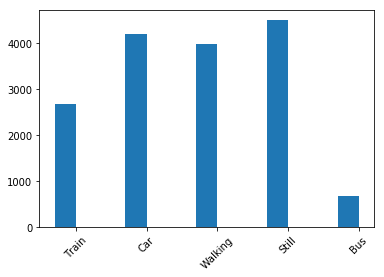

In [10]:
# histogram of samples by mode
from TMDataset import TMDataset
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_csv('TransportationData/_Dataset/dataset.csv')

dataframe = dataframe[dataframe.user != 'U1']

nsamples_per_mode = dataframe['target'].value_counts().to_dict()
list_of_nsamples = nsamples_per_mode.values()
list_of_modes = nsamples_per_mode.keys()
ax = plt.subplot(111)
width=0.3
bins = map(lambda x: x-width/2,range(1,len(list_of_nsamples)+1))
ax.bar(bins,list_of_nsamples,width=width)
ax.set_xticks(map(lambda x: x, range(1,len(list_of_nsamples)+1)))
ax.set_xticklabels(list_of_modes,rotation=45)
ax.set_xticklabels(list_of_modes)
plt.savefig(os.path.join(dir_out,  'samplesPerMode.svg'), bbox_inches='tight')


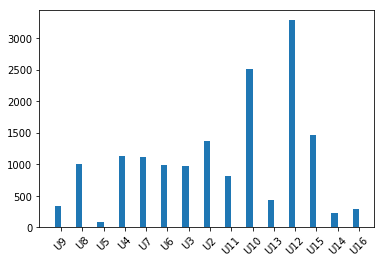

In [8]:
# histogram of samples by user
from TMDataset import TMDataset
import matplotlib.pyplot as plt
import pandas as pd
import collections

dataframe = pd.read_csv('TransportationData/_Dataset/dataset.csv')

dataframe = dataframe[dataframe.user != 'U1']

nsamples_per_user = dataframe['user'].value_counts().to_dict()
#nsamples_per_user = collections.OrderedDict(sorted(nsamples_per_user.items()))
list_of_nsamples = nsamples_per_user.values()
list_of_users = nsamples_per_user.keys()
ax = plt.subplot(111)
width=0.3
bins = map(lambda x: x-width/2,range(1,len(list_of_nsamples)+1))
ax.bar(bins,list_of_nsamples,width=width)
ax.set_xticks(map(lambda x: x, range(1,len(list_of_nsamples)+1)))
ax.set_xticklabels(list_of_users,rotation=45)
ax.set_xticklabels(list_of_users)
plt.savefig(os.path.join(dir_out,  'samplesPerUser.svg'), bbox_inches='tight')
